In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/raj/Documents/Corpnce AI/practice/data/NetFlix.csv')

## find which genre movies are most popular in us

In [3]:
data.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'genres',
 'description']

We need to get US countries and genres


In [7]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [69]:
counter =0 
for item in data['country'].tolist():
    # print(item)
    if 'United' not in item:
        # print(item)
        counter +=1
print(counter)

3979


In [96]:
print(data['country'].value_counts())

us_genre = data[['country']]
us_genre = us_genre.fillna('')

print(us_genre.value_counts())
us_genre = us_genre[data['country'].str.contains('United States')]
print(us_genre.value_counts())

country
United States                             2555
India                                      923
                                           507
United Kingdom                             397
Japan                                      226
                                          ... 
Argentina, United States, Mexico             1
Canada, Germany, France, United States       1
Soviet Union, India                          1
Taiwan, China, France, United States         1
France, Belgium, Spain                       1
Name: count, Length: 682, dtype: int64
country                          
United States                        2555
India                                 923
                                      507
United Kingdom                        397
Japan                                 226
                                     ... 
Indonesia, Netherlands                  1
Indonesia, South Korea, Singapore       1
Indonesia, United Kingdom               1
Indonesia, United States

In [98]:
us_genre.describe()

,country
count,3297
unique,320
top,United States
freq,2555


In [102]:
us_genre = data[['country', 'genres', 'type']]
us_genre = us_genre.fillna('')

us_genre = us_genre[data['country'].str.contains('United States')]
us_genre = us_genre[data['type'].str.contains('Movie')]
us_genre

us_genre = us_genre[['genres']]
us_genre = us_genre['genres'].str.split(',').explode()
us_genre.head(10)

/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_40520/3201541956.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_genre = us_genre[data['type'].str.contains('Movie')]


3                Comedies
5      Independent Movies
5               Thrillers
6      Action & Adventure
6                Comedies
7                  Dramas
7      Independent Movies
7         Romantic Movies
12       Music & Musicals
12        Stand-Up Comedy
Name: genres, dtype: object

<Axes: xlabel='genres'>

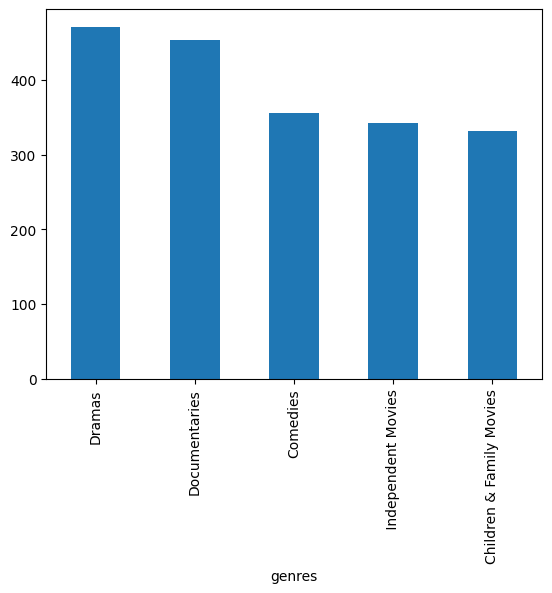

In [103]:

us_genre_count = us_genre.value_counts().head(5)
us_genre_count
us_genre_count.plot(kind='bar')


which month of the year has seen the most release after 2015

In [29]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


/var/folders/cm/xbcw7tbj7ks0tkxmz2yy2pch0000gn/T/ipykernel_40520/2863291128.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  month_release['date_added'] = pd.to_datetime(month_release['date_added'])


<Axes: xlabel='date_added'>

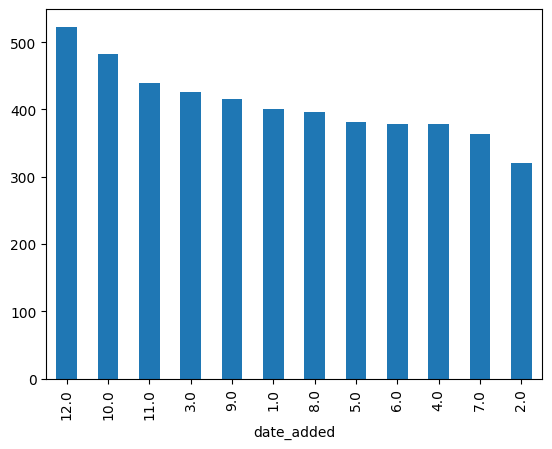

In [56]:
month_release = data[data['release_year'] > 2015]
# month_release

month_release = month_release[['date_added']].copy()
# month_release

month_release.fillna('')

month_release['date_added'] = pd.to_datetime(month_release['date_added'])
# month_release
month_dates = month_release['date_added'].dt.month
month_dates
month_data = month_dates.value_counts()

month_data.plot(kind='bar')

## Which actors acted in most movies

In [74]:
data.head(2)
actor_data = data[['cast']]
# mask = actor_data['cast'].notna() & 
actor_data

,cast
0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup..."
2,"Reza Rahadian, Bunga Citra Lestari, Tara Basro..."
3,"Alan Ritchson, Darin Brooks, James Cade, Rob R..."
4,David Attenborough
...,...
7782,
7783,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,..."
7784,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio..."
7785,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L..."


In [80]:
actor_data['cast'].str.split(',').explode()
actor_data

,cast
0,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup..."
2,"Reza Rahadian, Bunga Citra Lestari, Tara Basro..."
3,"Alan Ritchson, Darin Brooks, James Cade, Rob R..."
4,David Attenborough
...,...
7782,
7783,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,..."
7784,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio..."
7785,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L..."


<Axes: xlabel='cast'>

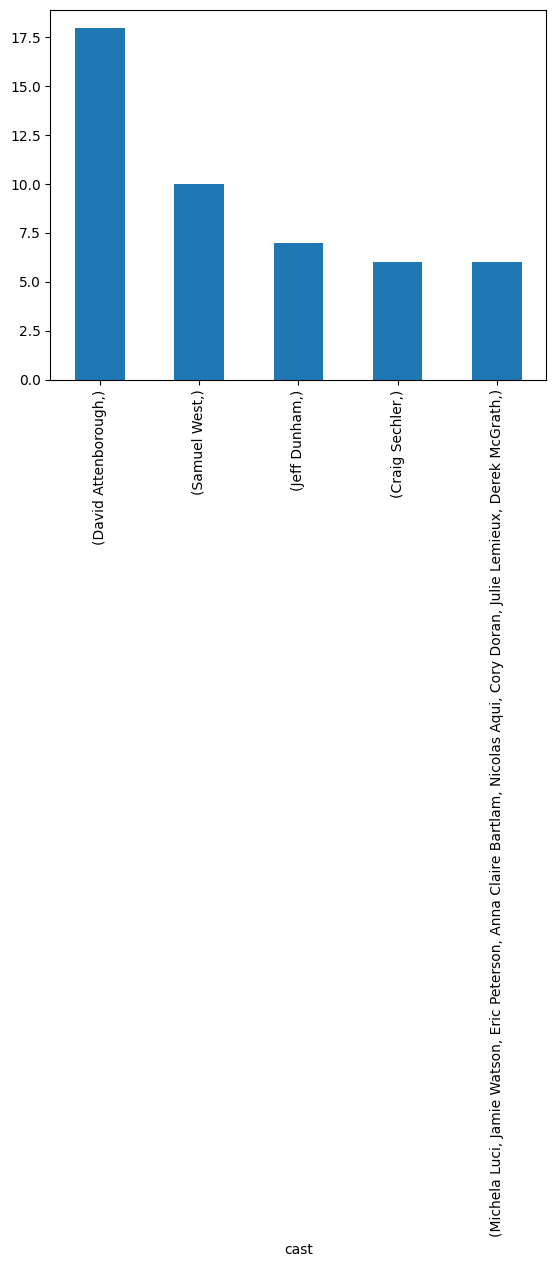

In [88]:
mask = actor_data['cast'].notna() & (actor_data['cast'].str.strip() != '')
actor_data = actor_data[mask]
act_data = actor_data.value_counts().head(5)
act_data
act_data.plot(kind='bar')

In [85]:


mask = actor_data['cast'].notna() & (actor_data['cast'].str.strip() != '')
actor_data = actor_data[mask]
act_data = actor_data.value_counts().head(10)
act_data
# act_data.plot(kind='bar')

cast                                                                                                                  
David Attenborough                                                                                                        18
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Kevin Hart                                                                                                                 6
Iliza Shlesinger                                                                                                           5
Jim Ga

distribution of movies by length    

In [104]:
data = pd.read_csv('/Users/raj/Documents/Corpnce AI/practice/data/NetFlix.csv')

In [107]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


<Axes: >

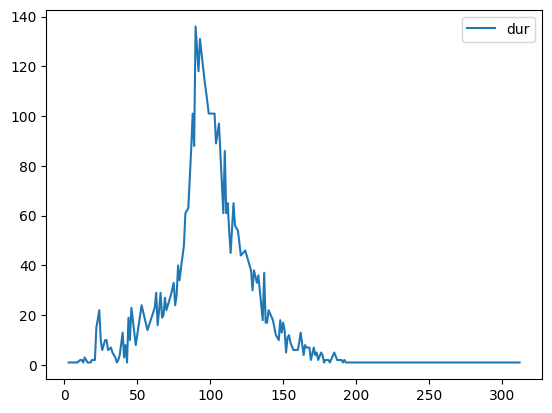

In [156]:
movie_len = data[['type', 'duration']].copy()
# movie_len.isnull().sum()
movie_len = movie_len[data['type'] == 'Movie']
movie_len = movie_len[movie_len['duration'].notna()]
# movie_len['duration']
# movie_len.isnull().sum()
movie_len['dur'] =  movie_len['duration'].value_counts()

movie_len = movie_len[['dur']].dropna()
movie_len.plot()


In [ ]:
plt.figure(figsize=(10, 6))



[23,
 14,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]